In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,...,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Frankie Edgar,Chan Sung Jung,Marc Goddard,21/12/2019,"Busan, South Korea",Blue,False,Featherweight,0.640625,0.250000,0.527813,0.218906,0.039062,0.051875,0.109375,0.000000,0.000000,0.062500,107.218750,45.562500,84.281250,36.234375,114.203125,51.984375,88.640625,40.375000,1.531250,0.140625,1.890625,0.312500,99.187500,40.343750,61.468750,19.156250,4.562500,2.906250,10.984375,7.250000,3.468750,2.312500,...,13.493803,16.868876,15.006171,1.873427,1.743382,175.568652,65.679113,207.667411,75.158306,8.032103,2.785386,7.588523,6.624681,6.955678,5.161024,2.041177,1.476266,109.892423,1.461462,1111.493441,88,9,3,0,5,17,8,0,0,0,10,4,2,1,Orthodox,167.64,172.72,135.0,32.0,38.0
1,Demian Maia,Gilbert Burns,Osiris Maia,14/03/2020,"Brasilia, Distrito Federal, Brazil",Blue,False,Welterweight,0.085938,0.064453,0.451309,0.483462,0.381777,0.007656,0.628418,0.031250,0.000000,0.000000,81.864502,37.846924,58.615234,27.540771,106.946533,58.056641,81.474121,48.232666,4.558838,1.868896,1.297119,0.029297,55.909912,18.407959,38.884766,13.138672,11.435791,7.790527,9.397705,5.156006,14.518799,11.648438,...,4.291287,0.086898,0.055461,4.964022,4.608549,63.789234,28.590728,99.628348,33.983406,10.254398,8.707325,7.377485,6.000193,2.069175,2.018790,6.464584,5.126843,167.611663,94.999332,817.937082,85,2,5,0,7,22,9,0,1,1,8,1,11,0,Southpaw,185.42,182.88,170.0,33.0,42.0
2,Jeremy Stephens,Calvin Kattar,Jason Herzog,09/05/2020,"Jacksonville, Florida, USA",Blue,False,Featherweight,0.406250,0.000000,0.425938,0.385937,0.020625,0.187500,0.000000,0.000000,0.000000,0.000000,142.562500,56.062500,166.625000,65.812500,167.281250,80.375000,169.343750,68.000000,0.250000,0.062500,2.562500,0.625000,122.781250,42.312500,118.906250,32.031250,15.000000,9.093750,21.562500,10.312500,4.781250,4.656250,...,8.939790,7.030667,4.478662,13.571218,11.717508,50.642406,17.832630,71.605563,37.668392,6.180892,3.385892,5.286392,3.255120,16.937159,12.802878,32.993547,20.057137,168.481289,118.301661,615.923765,83,0,0,1,3,15,17,0,0,1,6,7,0,1,Orthodox,175.26,180.34,145.0,32.0,33.0
3,Rafael Dos Anjos,Michael Chiesa,Kevin MacDonald,25/01/2020,"Raleigh, North Carolina, USA",Blue,False,Welterweight,0.000488,0.000000,0.567676,0.491113,0.694290,0.322051,0.330811,0.582031,0.500977,0.269531,46.325928,28.934082,19.233154,8.840332,84.116455,58.024414,34.984131,22.471191,5.184082,3.854004,1.249023,0.603516,43.682861,26.550781,11.928955,3.357178,2.239502,2.105713,2.983643,1.360840,0.403564,0.277588,...,15.257789,20.443018,17.054474,6.709640,6.498402,133.149348,61.748360,157.986829,59.575643,13.161959,11.233763,17.764038,13.743448

Filling null values with values


In [152]:
print(df.head())

          R_fighter       B_fighter  ... B_age R_age
0     Frankie Edgar  Chan Sung Jung  ...  32.0  38.0
1       Demian Maia   Gilbert Burns  ...  33.0  42.0
2   Jeremy Stephens   Calvin Kattar  ...  32.0  33.0
3  Rafael Dos Anjos  Michael Chiesa  ...  32.0  35.0
4       Demian Maia      Ben Askren  ...  35.0  41.0

[5 rows x 144 columns]


In [153]:

print(df['B_avg_BODY_landed'])
print(df['B_avg_BODY_landed'].isnull())

0       2.906250
1       7.790527
2       9.093750
3       2.105713
4       0.000000
          ...   
6007         NaN
6008         NaN
6009         NaN
6010         NaN
6011         NaN
Name: B_avg_BODY_landed, Length: 6012, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
6007     True
6008     True
6009     True
6010     True
6011     True
Name: B_avg_BODY_landed, Length: 6012, dtype: bool


In [154]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("data.csv", na_values = missing_values)
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,...,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Frankie Edgar,Chan Sung Jung,Marc Goddard,21/12/2019,"Busan, South Korea",Blue,False,Featherweight,0.640625,0.250000,0.527813,0.218906,0.039062,0.051875,0.109375,0.000000,0.000000,0.062500,107.218750,45.562500,84.281250,36.234375,114.203125,51.984375,88.640625,40.375000,1.531250,0.140625,1.890625,0.312500,99.187500,40.343750,61.468750,19.156250,4.562500,2.906250,10.984375,7.250000,3.468750,2.312500,...,13.493803,16.868876,15.006171,1.873427,1.743382,175.568652,65.679113,207.667411,75.158306,8.032103,2.785386,7.588523,6.624681,6.955678,5.161024,2.041177,1.476266,109.892423,1.461462,1111.493441,88,9,3,0,5,17,8,0,0,0,10,4,2,1,Orthodox,167.64,172.72,135.0,32.0,38.0
1,Demian Maia,Gilbert Burns,Osiris Maia,14/03/2020,"Brasilia, Distrito Federal, Brazil",Blue,False,Welterweight,0.085938,0.064453,0.451309,0.483462,0.381777,0.007656,0.628418,0.031250,0.000000,0.000000,81.864502,37.846924,58.615234,27.540771,106.946533,58.056641,81.474121,48.232666,4.558838,1.868896,1.297119,0.029297,55.909912,18.407959,38.884766,13.138672,11.435791,7.790527,9.397705,5.156006,14.518799,11.648438,...,4.291287,0.086898,0.055461,4.964022,4.608549,63.789234,28.590728,99.628348,33.983406,10.254398,8.707325,7.377485,6.000193,2.069175,2.018790,6.464584,5.126843,167.611663,94.999332,817.937082,85,2,5,0,7,22,9,0,1,1,8,1,11,0,Southpaw,185.42,182.88,170.0,33.0,42.0
2,Jeremy Stephens,Calvin Kattar,Jason Herzog,09/05/2020,"Jacksonville, Florida, USA",Blue,False,Featherweight,0.406250,0.000000,0.425938,0.385937,0.020625,0.187500,0.000000,0.000000,0.000000,0.000000,142.562500,56.062500,166.625000,65.812500,167.281250,80.375000,169.343750,68.000000,0.250000,0.062500,2.562500,0.625000,122.781250,42.312500,118.906250,32.031250,15.000000,9.093750,21.562500,10.312500,4.781250,4.656250,...,8.939790,7.030667,4.478662,13.571218,11.717508,50.642406,17.832630,71.605563,37.668392,6.180892,3.385892,5.286392,3.255120,16.937159,12.802878,32.993547,20.057137,168.481289,118.301661,615.923765,83,0,0,1,3,15,17,0,0,1,6,7,0,1,Orthodox,175.26,180.34,145.0,32.0,33.0
3,Rafael Dos Anjos,Michael Chiesa,Kevin MacDonald,25/01/2020,"Raleigh, North Carolina, USA",Blue,False,Welterweight,0.000488,0.000000,0.567676,0.491113,0.694290,0.322051,0.330811,0.582031,0.500977,0.269531,46.325928,28.934082,19.233154,8.840332,84.116455,58.024414,34.984131,22.471191,5.184082,3.854004,1.249023,0.603516,43.682861,26.550781,11.928955,3.357178,2.239502,2.105713,2.983643,1.360840,0.403564,0.277588,...,15.257789,20.443018,17.054474,6.709640,6.498402,133.149348,61.748360,157.986829,59.575643,13.161959,11.233763,17.764038,13.743448

In [155]:
#an array to store the fighter with their num_ko/tko
fighter_dec = {}

for i in range(0,len(df)):
    
    if df['R_fighter'][i] in fighter_dec:

        #if number of current dec > number of previous decisions
        if df['R_win_by_Decision_Majority'][i] + df['B_win_by_Decision_Split'][i] + df['B_win_by_Decision_Unanimous'][i] > fighter_dec[df['R_fighter'][i]]:

            #update Decision rate
            fighter_dec[df['R_fighter'][i]] =  df['R_win_by_Decision_Majority'][i] + df['R_win_by_Decision_Split'][i] + df['R_win_by_Decision_Unanimous'][i]

    else:
        #update Decision rate
        fighter_dec[df['R_fighter'][i]] =  df['R_win_by_Decision_Majority'][i] + df['R_win_by_Decision_Split'][i]+ df['R_win_by_Decision_Unanimous'][i]

    #is the fighter currently in the dictionary?
    if df['B_fighter'][i] in fighter_dec:

               #if number of current dec > number of previous decisions
        if df['B_win_by_Decision_Majority'][i] + df['B_win_by_Decision_Split'][i] + df['B_win_by_Decision_Unanimous'][i] > fighter_dec[df['B_fighter'][i]]:

            #update Decision rate
            fighter_dec[df['B_fighter'][i]] =  df['B_win_by_Decision_Majority'][i] + df['B_win_by_Decision_Split'][i] + df['B_win_by_Decision_Unanimous'][i]

    else:
        #update decision rate
        df_dec[df['B_fighter'][i]] =  df['B_win_by_Decision_Majority'][i] + df['B_win_by_Decision_Split'][i]+ df['B_win_by_Decision_Unanimous'][i]

KO/TKO

In [156]:
#an array to store the fighter with their num_ko/tko
fighter_ko = {}

for i in range(0,len(df)):
    #has th
    if df['R_fighter'][i] in fighter_ko:

        #if number of current kos > number of previous kos
        if df['R_win_by_KO/TKO'][i] + df['R_win_by_TKO_Doctor_Stoppage'][i] > fighter_ko[df['R_fighter'][i]]:

            #update ko/tko rate
            fighter_ko[df['R_fighter'][i]] =  df['R_win_by_KO/TKO'][i] + df['R_win_by_TKO_Doctor_Stoppage'][i]

    else:
        #update ko/tko rate
        fighter_ko[df['R_fighter'][i]] =  df['R_win_by_KO/TKO'][i] + df['R_win_by_TKO_Doctor_Stoppage'][i]

    #is the fighter currently in the dictionary?
    if df['B_fighter'][i] in fighter_ko:

        #if number of current kos > number of previous kos
        if df['B_win_by_KO/TKO'][i] + df['B_win_by_TKO_Doctor_Stoppage'][i]> fighter_ko[df['B_fighter'][i]]:

            #update ko/tko rate
            fighter_ko[df['B_fighter'][i]] =  df['B_win_by_KO/TKO'][i] + df['B_win_by_TKO_Doctor_Stoppage'][i]

    else:
        #update ko/tko rate
        fighter_ko[df['B_fighter'][i]] =  df['B_win_by_KO/TKO'][i] + df['B_win_by_TKO_Doctor_Stoppage'][i]

In [157]:
#an array to store the fighter with their submission victories
fighter_sub = {}

for i in range(0,len(df)):
    #has th
    if df['R_fighter'][i] in fighter_sub:

        #if number of current subs > number of previous subs
        if df['R_win_by_Submission'][i] > fighter_sub[df['R_fighter'][i]]:

            #update submission rate
            fighter_sub[df['R_fighter'][i]] =  df['R_win_by_Submission'][i]

    else:
        #update submission rate
        fighter_sub[df['R_fighter'][i]] =  df['R_win_by_Submission'][i]

    #is the fighter currently in the dictionary?
    if df['B_fighter'][i] in fighter_sub:

        #if number of current submissions > number of previous submissions
        if df['B_win_by_Submission'][i]> fighter_sub[df['B_fighter'][i]]:

            #update ko/tko rate
            fighter_sub[df['B_fighter'][i]] =  df['B_win_by_Submission'][i]

    else:
        #update submission rate
        fighter_sub[df['B_fighter'][i]] =  df['B_win_by_Submission'][i]




convert to data frame to sort in descending order

Text(0, 0.5, 'Fights')

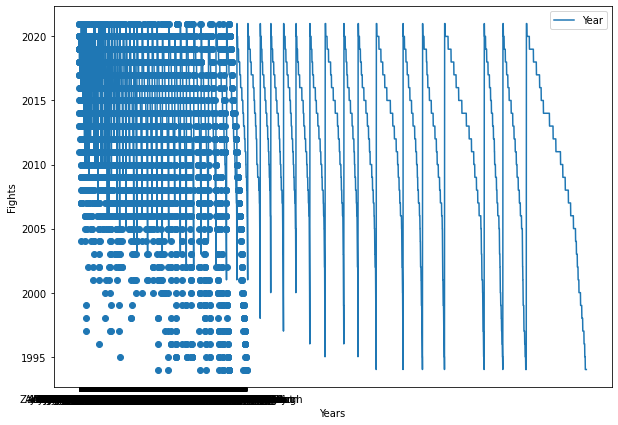

In [161]:
from IPython.core.pylabtools import figsize

df_ko = pd.DataFrame(fighter_ko.items(), columns=['Fighter', 'KO/TKO'])
df_ko.sort_values(by=['KO/TKO'],ascending=False)
df_dec = pd.DataFrame(fighter_dec.items(), columns=['Fighter', 'Submissions'])
df_dec.sort_values(by=['Submissions'],ascending=False)
#yr = [  '2000','2005','2010','2015','2020'
fightsPerYear = pd.DataFrame(df,columns=['Year','Fighter'])
df['date'] = pd.to_datetime(df['date'])
fightsPerYear['Fighter'] = df['B_fighter']
fightsPerYear['Year'] = df['date'].dt.year


fightsPerYear.plot(figsize=(10,7))
plt.scatter(fightsPerYear['Fighter'],fightsPerYear['Year'])
plt.xlabel("Years")
plt.ylabel("Fights")

So What I tried to do here is I tried to establish an increase in UFC events and fights since the founding of the UFC. What the graph is and should the axis are wrong in this graph. In 2020 its very heavily dense with fights, and it started to rise around to the 2014 mark, why?? because the UFC signed Conor Mcgregor from Cage Warriors. Accorrding to Forbes They had roughly $600 million generated, up over $150 million from 2014, was not a big surprise coming off a year plagued by injuries and event changes. The profit the company was reportedly able to turn last year, however, represents a big leap for Dana White and the Fertitta brothers. With this extra money coming in, the UFC signed more to there roster and started doing events all over the world, most recently a UFC event in Yas Island in Abu Dhabi.

Fights Per Year Compared to Title Fights Per Year

In [ ]:
df['title_bout'] = df.replace({'True':1,'False':0})
titledf = df[df["title_bout"]==1]

nonTitle=df["title_bout"]
fighter = fightsPerYear['Fighter']
titleData = {
                'fighter': fightsPerYear['Fighter'],
            'title bouts':  df["title_bout"].value_counts(True),
        }
titeldf = pd.DataFrame(titleData)


titledf.head().plot()

What I was trying to do here was just to further on my point on th increase on events in recent times, with title fights, by looking at the data I know there's a surge in title fights. I kind of lost my way around this data analysis.

Age matters, and youth is a clear advantage.



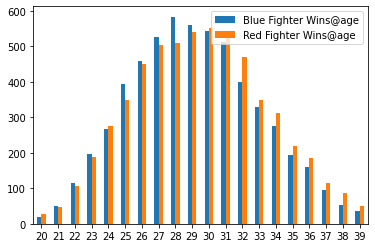

In [205]:
#Age
BlueAge = df.groupby(['B_age']).count()['Winner']
Blue_Age =  BlueAge.sort_values(axis=0, ascending=False)
RedAge = df.groupby(['R_age']).count()['Winner']
Red_Age= RedAge.sort_values(axis=0, ascending=False)
index=[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
p = pd.DataFrame({'Blue Fighter Wins@age': Blue_Age,
                   'Red Fighter Wins@age ': Red_Age}, index=index)
ax = p.plot.bar(rot=0)


From What I can derive from this chart is that a fighter from the blue corner has a higher chance of winning the fight IF they are younger than 30, and If a fighter from the red corner is older than 30 they have a greater chance at winning the fight. I've also learned that the UFC Champion of a weight class always in the Red Corner and the Challenger in the blue corner.

Younger fighters do not develop peak strength till 27-28~ while older fighters are usually slower and more likely to lose. Let’s check if this is true in our data. This time we will check for ‘Red’ fighters

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


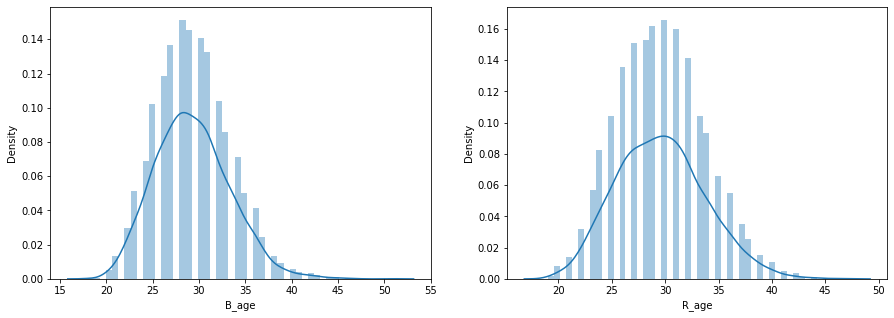

In [204]:
import seaborn as sns
import warnings
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df['B_age'], ax=ax[0])
sns.distplot(df.R_age, ax=ax[1])

As you can see here I presented this graph from both sides of the fight. This even proves my point even more as the bell curve climaxes on the Blue Corners plot at around 30 years of age, Where the Red Corner plot is climaxing at around 32 years of age. Clearly, most fights have been won by fighters in their late 20’s through early 30’s as they peak during this time and then lose strength, quickness and cardiovascular capacity

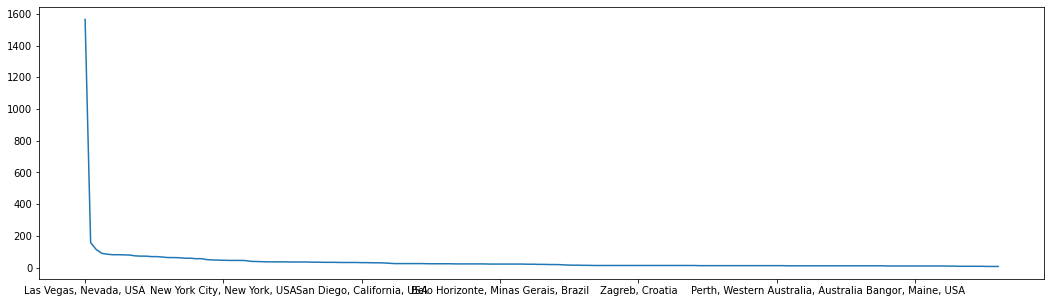

In [163]:
locations = df['location'].value_counts()
location = locations.sort_values(axis=0, ascending=False)
location.head(10)
location.plot(figsize=(18,5))

As you can see the most UFC events are in Las Vegas, Nevada. No suprise, really as it was the UFC's only venue for a while. Most recently, during the Covid-19 outbreak, They opened their very own venue called the "UFC Apex Center". This was used because no venues would allow events ran that had no crowds, so no profit realistically.In the pandemic, There was 42 events held in the Apex with in a year 4 months. As well UFC are an American comapny so they like to keep it local when possible.

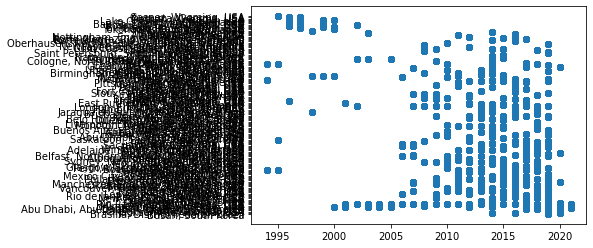

In [184]:
plt.scatter(fightsPerYear['Year'],df['location'], linewidths=1)
plt.show()

I know it very hard to see but on the very bottom of the graph is the Las Vegas and it shows how many events has happened recently.A lot more venues rather than Las Vegas were getting more UFC events like Abu Dhabi and in Florida as well. As they were the only venues available during the global pandemic.

In [ ]:

#Height
BlueHeight = df.groupby(['B_Height_cms']).count()['Winner']
Blue_Height =  BlueHeight.sort_values(axis=0, ascending=False)
RedHeight = df.groupby(['R_Height_cms']).count()['Winner']
Red_Height= RedHeight.sort_values(axis=0, ascending=False)
index=[150,155,160,165,170,175,175,180,185,190,195,200,205]
hht = pd.DataFrame({'Blue Fighter Wins@Height': Blue_Height,
                   'Red Fighter Wins@Height ': Red_Height}, index=index)
ax = hht.plot.bar(rot=0)

Height is also a major advantage in MMA as it means more the height more is the reach, meaning - taller fighter can attack from a distance keeping themselves safe from the hitting zone. Let's start by looking at the distribution of height:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


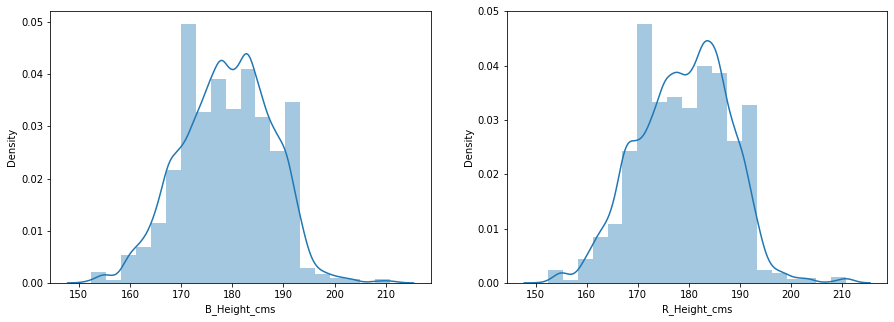

In [187]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
BHeight_cms = df['B_Height_cms']
sns.distplot(BHeight_cms, bins = 20, ax=ax[0]) #Blue 
sns.distplot(df['R_Height_cms'], bins = 20, ax=ax[1]) #Red

This represents the UFC fighters heights from both sides of the cage, Looking at the curve It looks like the red corner has more people being taller than the blue corner, does it matter? lets see 

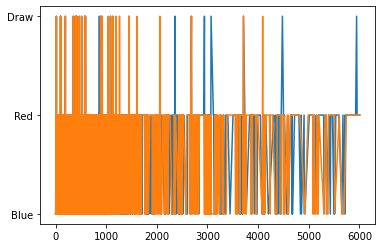

In [197]:
BHgtWin = df.groupby('B_Height_cms')['Winner']
RHgtWin =df.groupby('R_Height_cms')['Winner']
plt.plot(BHgtWin.head(100))
plt.plot(RHgtWin.head(100))